### EGOR ZAITSEV - 07 452 541

### XIAOXU YAO - 07 498 897

### Exercise 1: Simple Functions

#### Implement the Newton algorithm for any function $f\colon\mathbb R\to\mathbb R$

In [1]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import fsolve, least_squares

In [417]:
def newton(x0, f, df, ddf, epsilon = 10e-5, delta = 10e-5, maxiter = 1000):
    """
    Newton algorithm to find local extrema of a function

    Arguments:
    x0 - initial guess
    f - function in question
    df - corresponding first derivative
    ddf - corresponding second derivative

    Returns:
    (if successful):
        [z, fz, dfz, ddfz] - array of information on z where z is a local extremum
    (if not successful):
        [x1, fx1, dfx1, ddfx1] - array of information on the current iterate
    """

    for iter in range(maxiter):
        fx0 = f(x0)
        dfx0 = df(x0)
        ddfx0 = ddf(x0)
        
        x1 = x0 - dfx0/ddfx0 # ITERATION RULE
        fx1 = f(x1)

        d = np.linalg.norm(x1)
        D = np.linalg.norm(x1-x0)

        if D <= epsilon*(1 + d) and np.abs(df(x1)) <= delta*(1 + np.abs(f(x1))):
            z = x1
            return [z, f(z), df(z), ddf(z)]
        else:
            x0 = x1
    
    print('NUMBER OF ITERATIONS REACHED')
    return [x1, f(x1), df(x1), ddf(x1)]


#### Calculate the extrema of the two functions:

$$f_1(x)=2x^3-x^2-3x+2$$

$$f_2(x)=-x\exp(-x)$$

In [418]:
def f1(x):
    return 2*x**3 - x**2 - 3*x + 2

def df1(x):
    return 6*x**2-2*x-3

def ddf1(x):
    return 12*x-2

def f2(x):
    return (-x)*np.exp(-x)

def df2(x):
    return np.exp(-x)*(x - 1)

def ddf2(x):
    return np.exp(-x)*(2 - x)

In [419]:
z1, f1z1, df1z1, ddf1z1 = newton(-2, f1, df1, ddf1) # LOCAL MAXIMUM
z2, f1z2, df1z2, ddf1z2 = newton(2, f1, df1, ddf1) # LOCAL MINIMUM
z, f2z, df2z, ddf2z = newton(-2, f2, df2, ddf2) # LOCAL MINIMUM

print('\n\nFUNCTION 1 LOCAL MAXIMUM: ({:.2f}, {:.2f})'.format(z1, f1z1))
print('FUNCTION 1 LOCAL MINIMUM: ({:.2f}, {:.2f})'.format(z2, f1z2))
print('FUNCTION 2 LOCAL MINIMUM: ({:.2f}, {:.2f})'.format(z, f2z))



FUNCTION 1 LOCAL MAXIMUM: (-0.56, 3.02)
FUNCTION 1 LOCAL MINIMUM: (0.89, -0.05)
FUNCTION 2 LOCAL MINIMUM: (1.00, -0.37)


#### Plot the functions and show the critical points on the graphs

(-1.0, 1.0)

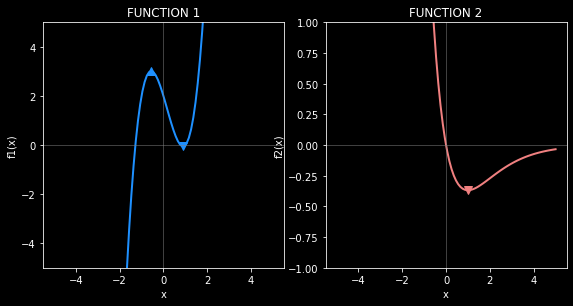

In [420]:
x = np.linspace(-5, 5, 100)
y1 = f1(x)
y2 = f2(x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.tight_layout()
ax1.plot(x, y1, color = 'dodgerblue', linewidth = 2)
ax1.plot(z1, f1z1, marker = '^', color = 'dodgerblue', markersize = 8) # LOCAL MAXIMUM
ax1.plot(z2, f1z2, marker = 'v', color = 'dodgerblue', markersize = 8) # LOCAL MINIMUM
ax1.axhline(y = 0, color = 'gray', linewidth = 0.5)
ax1.axvline(x = 0, color = 'gray', linewidth = 0.5)
ax1.title.set_text('FUNCTION 1')
ax1.set_xlabel('x')
ax1.set_ylabel('f1(x)')
ax1.set_ylim(-5, 5)

ax2.plot(x, y2, color = 'lightcoral', linewidth = 2)
ax2.plot(z, f2z, marker = 'v', color = 'lightcoral', markersize = 8) # LOCAL MINIMUM
ax2.axhline(y = 0, color = 'gray', linewidth = 0.5)
ax2.axvline(x = 0, color = 'gray', linewidth = 0.5)
ax2.title.set_text('FUNCTION 2')
ax2.set_xlabel('x')
ax2.set_ylabel('f2(x)')
ax2.set_ylim(-1, 1)

### Exercise 2: Solving the Augmented Solow Growth Model

#### Derive the analytic solution $x^*=(k^*,h^*)$ and compute its value for the given parametrization

The changes in physical and human capital are given by

$$\tag{1}k_{t+1}=\frac{1}{(1+n)(1+g)}\biggr(s_kf(k_t,h_t)+(1-\delta_k)k_t\biggr)$$

$$\tag{2}h_{t+1}=\frac{1}{(1+n)(1+g)}\biggr(s_hf(k_t,h_t)+(1-\delta_h)h_t\biggr)$$

The production function $f(k_t,h_t)$ is given by

$$\tag{3}f(k_t,h_t)=k_t^\alpha h_t^\beta$$

where $s_k,s_h,\delta_k,\delta_h\in[0,1]$

The stationary solutions for physical and human capital $k^*,h^*$ are given by

$$k_{t+1}=k_t=k\quad h_{t+1}=h_t=h$$

Hence, by plugging $(3)$ into $(1)$ and $(2)$ we obtain

$$\tag{4}s_kk^\alpha h^\beta-(\delta_k+g+n+ng)k=0$$

$$\tag{5}s_hk^\alpha h^\beta-(\delta_h+g+n+ng)h=0$$

Consider $(4)$. By carrying over the second term over the equal sign, dividing both sides by $(\delta_k+g+n+ng)$, then by $k^\alpha$ and finally elevating to the power $\frac{1}{1-\alpha}$ we obtain physical capital as a function of human capital

$$\tag{6}k(h)=\biggr(\frac{s_kh^\beta}{\delta_k+n+g+ng}\biggr)^{\frac{1}{1-\alpha}}$$

Substituting $k$ in $(4)$ with $(6)$ and simplyfing yield $h^*$

$$h^*=\biggr(\frac{s_h}{\delta_h+n+g+ng}\biggr)^{\frac{1-\alpha}{1-\alpha-\beta}}\biggr(\frac{s_k}{\delta_k+n+g+ng}\biggr)^{\frac{\alpha}{1-\alpha-\beta}}$$

Plugging $h^*$ into $k(h)$ we obtain $k^*$

$$k^*=\biggr(\frac{s_k}{\delta_k+n+g+ng}\biggr)^{\frac{1-\beta}{1-\alpha-\beta}}\biggr(\frac{s_h}{\delta_h+n+g+ng}\biggr)^{\frac{\beta}{1-\alpha-\beta}}$$

At given parameters $k^*$ and $h^*$ equal

$$k^*\approx 5.77\quad h^*\approx 8.48$$

#### Now assume the analytical solution is not available. Write a function that returns the function value and the Jacobian of the steady state condition

##### Balanced growth path function of capital and its first derivative

In [421]:
def fk(k, h, y, Sk, Dk, n, g):
    """
    Balanced growth path of physical capital.

    Arguments:
    k - input physical capital
    h - input human capital
    y - input production function
    Sk - savings rate of physical capital
    Dk - depreciation rate of physical capital
    n - popultaion growth rate
    g - productivity growth rate

    Returns:
    fk - function value evaluated at (k, h) given y
    """
    fk = Sk*y - (Dk + n + g + n*g)*k

    return fk

def dfk(k, h, dy, Sk, Dk, n, g):
    """
    First derivative of balanced growth path of physical capital.

    Arguments:
    k - input physical capital
    h - input human capital
    dy - first derivative of input production function
    Sk - savings rate of physical capital
    Dk - depreciation rate of physical capital
    n - popultaion growth rate
    g - productivity growth rate

    Returns:
    dfk - first derivative value evaluated at (k, h) given dy

    """
    dfk = Sk*dy - (Dk + n + g + n*g)

    return dfk

##### Balanced growth path function of human capital and its first derivative

In [422]:
def fh(h, k, y, Sh, Dh, n, g):
    """
    Balanced growth path of human capital.

    Arguments:
    h - input human capital
    k - input physical capital
    y - input production function
    Sh - savings rate of human capital
    Dh - depreciation rate of human capital
    n - popultaion growth rate
    g - productivity growth rate

    Returns:
    fh - function value evaluated at (k, h) given y
    """
    fh = Sh*y - (Dh + n + g + n*g)*h

    return fh

def dfh(h, k, dy, Sh, Dh, n, g):
    """
    First derivative of balanced growth path of human capital.

    Arguments:
    h - input human capital
    k - input physical capital
    dy - first derivative of input production function
    Sk - savings rate of physical capital
    Dk - depreciation rate of physical capital
    n - popultaion growth rate
    g - productivity growth rate

    Returns:
    dfh - first derivative value evaluated at (k, h) given dy

    """
    dfh = Sh*dy - (Dh + n + g + n*g)

    return dfh

##### Production function and its first derivative

In [423]:
def y(k, h, Ak, Ah):
    """
    Intensive form of Cobb-Douglas production function.

    Arguments:
    k - input physical capital
    h - input human capital
    Ak - power of physical capital
    Ah - power of human capital

    Returns:
    y - function value evaluated at (k, h)
    """
    y = k**Ak*h**Ah

    return y

def dy(k, h, Ak, Ah, wrt):
    """
    First derivative of intensive form of Cobb-Douglas production function.

    Arguments:
    k - input physical capital
    h - input human capital
    Ak - power of physical capital
    Ah - power of human capital
    wrt - with respect to what variable. Inputs are 'k' or 'h'

    Returns:
    dy - first derivative value evaluated at (k, h)
    """
    if wrt == 'k':
        dy = Ak*k**(Ak-1)*h**Ah
    elif wrt == 'h':
        dy = Ah*h**(Ah-1)*k**Ak
    else:
        print("wrt must be either 'k' or 'h'")
    
    return dy

##### System of nonlinear equations combined into a function

In [424]:
Sk, Sh, n, g, Dk, Dh, z, Ak, Ah, k0, h0  = 0.2, 0.2, 0.01, 0.015, 0.1, 0.06, 1, 0.33, 0.33, 3, 3

def solow(k, h, fk = fk, dfk = dfk, fh = fh, dfh = dfh, y = y, dy = dy, Sk = Sk, Sh = Sh, Dk = Dk, Dh = Dh, Ak = Ak, Ah = Ah, n = n, g = g):
    """
    Returns function value and the Jacobian of the steady state condition.

    Arguments:
    k - input physical capital
    h - input human capital
    fk - balanced growth of physical capital function
    fh - balanced growth of human capital function
    dfk - first derivative of balanced growth function of physical capital
    dfh - first derivative of balanced growth function of human capital
    y - production function
    dy - first derivative of production function
    Sk - savings rate of physical capital
    Sh - savings rate of human capital
    Dk - depreciation rate of physical capital
    Dh - depreciation rate of human capital
    Ak - power of physical capital
    Ah - power of human capital
    n - popultaion growth rate
    g - productivity growth rate
    Returns:
    x, dx - variables of function value and first derivative evaluated at (k, h)
    """
    ry = y(k, h, Ak, Ah)
    rk = fk(k, h, ry, Sk, Dk, n, g)
    rh = fh(h, k, ry, Sh, Dh, n, g)

    f = [rk, rh] # FUNCTION VALUE AT (k, h)

    dryk = dy(k, h, Ak, Ah, wrt = 'k')
    drk = dfk(k, h, dryk, Sk, Dk, n, g)
    dryh = dy(h, k, Ak, Ah, wrt = 'h')
    drh = dfh(h, k, dryh, Sh, Dh, n, g)

    df = [drk, drh]

    return f, df


#### Program and use Newton's method for root-finding. Letting $\hat{x}^*=(\hat{k}^*,\hat{h}^*)$ denote the approximate soluton, report $\left|\left|\hat{x}^*-x^*\right|\right|_\infty$. Increase the accuracy of your algorithm by setting stricter convergence criteria, again report $\left|\left|\hat{x}^*-x^*\right|\right|_\infty$ and compare

In [425]:
def xStar(Sk = Sk, Sh = Sh, Dk = Dk, Dh = Dh, Ak = Ak, Ah = Ah, n = n, g = g):
    """
    Calculate x* using the analytical solutions.

    Arguments:
    Sk - savings rate of physical capital
    Sh - savings rate of human capital
    Dk - depreciation rate of physical capital
    Dh - depreciation rate of human capital
    Ak - power of physical capital
    Ah - power of human capital
    n - popultaion growth rate
    g - productivity growth rate

    Returns:
    xstar - analytical solution such that f(xstar) = 0
    """
    kstar = (Sk/(Dk + n + g + n*g))**((1-Ah)/(1-Ak-Ah))*(Sh/(Dh + n + g + n*g))**(Ah/(1-Ak-Ah))
    hstar = (Sh/(Dh + n + g + n*g))**((1-Ak)/(1-Ak-Ah))*(Sk/(Dk + n + g + n*g))**(Ak/(1-Ak-Ah))
    xstar = [kstar, hstar]

    return xstar

In [426]:
def newton(epsilon, delta, k0 = 3, h0 = 3, maxiter = 1000):
    """
    Newton method to solve the Solow augmented model.

    Arguments:
    k0 - initial guess of physical capital
    h0 - initial guess of human capital
    epsilon - tolerance of distance between previous and current state
    delta - tolerance of value function
    maxiter - maximum number of iterations

    Returns:
    (if successful):
        iter, xhat - iteration number and current state such that f(xHat) = 0
    (if not successful):
        iter, x1 - iteration number and last iterate
    """
    x0 = [k0, h0]

    for iter in range(maxiter):
        f0, df0 = solow(k = x0[0], h = x0[1])
        x1 = x0 - np.divide(f0, df0)

        d = np.linalg.norm(x1)
        D = np.linalg.norm(x1 - x0)
        fd = np.linalg.norm(f0)

        if D <= epsilon * (1 + d) and fd <= delta:
            xhat = x1
            return iter, xhat

        else:
            x0 = x1

    print('maxiter reached')
    return iter, x1


In [427]:
xstar = xStar()
tolerances = [[10e-1, 10e-1], [10e-2, 10e-2] , [10e-5, 10e-5]]

# LOG TIME PASSED
t0 = time.clock()
iterN, xhat = newton(epsilon = 10e-5, delta = 10e-5)
t1 = time.clock()
tN = t1 - t0 # IN SECONDS

print('\nxstar is [{:.2f}, {:.2f}]\n'.format(xstar[0], xstar[1]))
for tolerance in range(len(tolerances)):
    iterN, xhat = newton(epsilon = tolerances[tolerance][0], delta = tolerances[tolerance][1])
    D = np.linalg.norm(xstar - xhat, ord = np.inf)
    print('sup-norm between xstar and xhat=[{:.2f}, {:.2f}] for epsilon=delta={}: {:.4f}'.format(xhat[0], xhat[1], tolerances[tolerance][0], D))


xstar is [5.77, 8.48]

sup-norm between xstar and xhat=[3.47, 6.97] for epsilon=delta=1.0: 2.2989
sup-norm between xstar and xhat=[5.86, 8.07] for epsilon=delta=0.1: 0.4076
sup-norm between xstar and xhat=[5.77, 8.48] for epsilon=delta=0.0001: 0.0003


#### Program and use the Broyden method for root-finding. Use the identity matrix as the initial guess for the Jacobian

In [428]:
def broyden(k0, h0, j0, epsilon = 10e-5, delta = 10e-5, maxiter = 1000):
    """
    Broyden aka Quasi-Newton method to solve the Solow augmented model.

    Arguments:
    k0 - initial guess of physical capital
    h0 - initial guess of human capital
    j0 - initial guess of approximate Jacobian
    epsilon - tolerance of distance between previous and current state
    delta - tolerance of value function
    maxiter - maximum number of iterations

    Returns:
    (if successful):
        iter, xhat - iteration number and current state such that f(xHat) = 0
    (if not successful):
        iter, x1 - iteration number and last iterate
    """
    x0 = np.array([k0, h0])

    for iter in range(maxiter):
        f0, _ = np.array(solow(k = x0[0], h = x0[1]))
        x1 = x0 - np.dot(np.linalg.inv(j0), f0) # NEXT ITERATE

        # NEXT JACOBIAN
        f1, _ = np.array(solow(k = x1[0], h = x1[1]))
        deltaf = f1 - f0
        deltax = x1 - x0
        deltaf = deltaf.reshape(len(deltaf), -1) # RESHAPE TO (2,1)
        deltax = deltax.reshape(len(deltax), -1) # RESHAPE TO (2,1)
        j1 = j0 + (np.dot(deltaf - np.dot(j0, deltax), deltax.T))/(np.dot(deltax.T, deltax))

        D = np.linalg.norm(x1 - x0)
        d = np.linalg.norm(x1)
        fd = np.linalg.norm(f1)

        if D <= epsilon * (1 + d) and fd <= delta:
            xhat = x1
            
            return iter, xhat
        else:
            x0 = x1
            j0 = j1
        
    print('maxiter reached.')
    
    return iter, x1



In [429]:
j0 = np.identity(2) # IDENTITY MATRIX OF SHAPE (2,2)
t0 = time.clock()
iterB, xhat = broyden(k0 = 3, h0 = 3, j0 = j0)
t1 = time.clock()
tB = t1 - t0

print("\nQuasi-Newton method statistics:\nepsilon=delta=10e-5\nconverged at iteration {}\nkhat={:.2f} and hhat={:.2f}".format(iterB, xhat[0], xhat[1]))


Quasi-Newton method statistics:
epsilon=delta=10e-5
converged at iteration 19
khat=5.77 and hhat=8.48


#### Program and use the Inverse Broyden method for root-finding. Use the identity matrix as the initial guess for the Jacobian

In [430]:
def inverseBroyden(k0, h0, b0, epsilon = 10e-5, delta = 10e-5, maxiter = 1000):
    """
    Inverse Broyden method to solve the Solow augmented model.

    Arguments:
    k0 - initial guess of physical capital
    h0 - initial guess of human capital
    b0 - initial guess of the inverse of approximate Jacobian
    epsilon - tolerance of distance between previous and current state
    delta - tolerance of value function
    maxiter - maximum number of iterations

    Returns:
    (if successful):
        iter, xhat - iteration number and current state such that f(xHat) = 0
    (if not successful):
        iter, x1 - iteration number and last iterate
    """
    x0 = np.array([k0, h0])

    for iter in range(maxiter):
        f0, _ = np.array(solow(k = x0[0], h = x0[1]))
        x1 = x0 - np.dot(b0, f0) # NEXT ITERATE

        # NEXT JACOBIAN
        f1, _ = np.array(solow(k = x1[0], h = x1[1]))
        deltaf = f1 - f0
        deltax = x1 - x0
        deltaf = deltaf.reshape(len(deltaf), -1) # RESHAPE TO (2,1)
        deltax = deltax.reshape(len(deltax), -1) # RESHAPE TO (2,1)
        b1 = b0 + np.dot(np.dot(deltax - np.dot(b0, deltaf), deltax.T), b0)/np.dot(np.dot(deltax.T, b0), deltaf)

        D = np.linalg.norm(x1 - x0)
        d = np.linalg.norm(x1)
        fd = np.linalg.norm(f1)

        if D <= epsilon * (1 + d) and fd <= delta:
            xhat = x1
            
            return iter, xhat
        else:
            x0 = x1
            b0 = b1
        
    print('maxiter reached.')
    
    return iter, x1
    

In [431]:
b0 = np.linalg.inv(np.identity(2)) # INVERSE OF IDENTITY MATRIX OF SHAPE (2,2)
t0 = time.clock()
iterIB, xhat = inverseBroyden(k0 = 3, h0 = 3, b0 = b0)
t1 = time.clock()
tIB = t1 - t0

print("\nInverse Broyden method statistics:\nepsilon=delta=10e-5\nconverged at iteration {}\nkhat={:.2f} and hhat={:.2f}".format(iterIB, xhat[0], xhat[1]))


Inverse Broyden method statistics:
epsilon=delta=10e-5
converged at iteration 19
khat=5.77 and hhat=8.48


#### Program and use a fixed-point iteration. Save all results from the iteration steps. Display a plot showing the resutls for $k$ over the iterations along with a horizontal line showing at the value of $k^*$. Doe the same for $h$. Provide an economic interpretation of the plots

In [432]:
def Fkh(k, h, y = y, Sk = Sk, Dk = Dk, Sh = Sh, Dh = Dh, Ak = Ak, Ah = Ah, n = n, g = g):
    """
    Intensive form of functions of physical and human capital.

    Arguments:
    k - input physical capital
    h - input human capital
    y - input production function
    Sk - savings rate of physical capital
    Dk - depreciation rate of physical capital
    Sh - savings rate of human capital
    Dh - depreciation rate of human capital
    Ak - power of physical capital
    Ah - power of human capital
    n - popultaion growth rate
    g - productivity growth rate

    Returns:
    Fk, Fh - function values evaluated at (k, h) given y
    """
    Y = y(k, h, Ak, Ah)
    Fk = 1/((1 + n)*(1 + g))*(Sk*Y + (1 - Dk)*k)
    Fh = 1/((1 + n)*(1 + g))*(Sh*Y + (1 - Dh)*h)

    return [Fk, Fh]

In [433]:
def fixedPoint(k0, h0, epsilon = 10e-5, delta = 10e-5, maxiter = 1000):
    """
    Fixed point iterative method to solve the Solow augmented model.

    Arguments:
    k0 - initial guess of physical capital
    h0 - initial guess of human capital
    epsilon - tolerance of distance between previous and current state
    delta - tolerance of value function
    maxiter - maximum number of iterations

    Returns:
    (if successful):
       iter, xhat, history - iteration number, current state such that f(xHat) = xHat and history of states
    (if not successful):
        iter, x1 - iteration number, last iterate and history of states
    """
    history = [[], []]
    x0 = np.array([k0, h0])
    history[0].append(x0[0])
    history[1].append(x0[1])
    
    for iter in range(maxiter):
        x1 = np.array(Fkh(k = x0[0], h = x0[1]))

        D = np.linalg.norm(x0 - x1)
        d = np.linalg.norm(x1)

        history[0].append(x1[0])
        history[1].append(x1[1])

        if D <= epsilon * (1 + d):
            return iter, x1, history
        else:
            x0 = x1
    
    print('maxiter reached.')
    return iter, fx0, history

In [434]:
t0 = time.clock()
iterFP, xhat, history = fixedPoint(k0 = 3, h0 = 3)
t1 = time.clock()
tFP = t1 - t0

print("\nFixed point method statistics:\nepsilon=delta=10e-5\nconverged at iteration {}\nkhat={:.2f} and hhat={:.2f}".format(iterFP, xhat[0], xhat[1]))


Fixed point method statistics:
epsilon=delta=10e-5
converged at iteration 163
khat=5.75 and hhat=8.45


Text(288.61590909090904, 0.5, 'h')

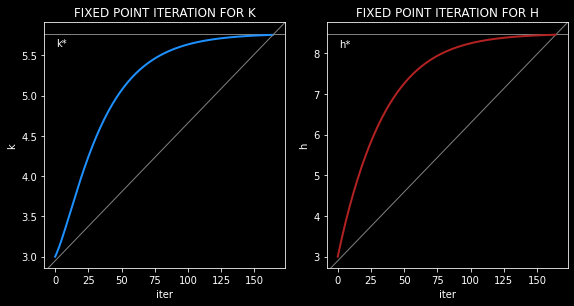

In [435]:
# CREATING HISTORY1 FOR GRAPHS 3 AND 4
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.tight_layout()
axes = axes.ravel()

axes[0].axhline(y = xstar[0], color = 'gray', linewidth = 1)
axes[0].text(1, xstar[0] - 0.125, 'k*', ha='left', va='center')
axes[0].plot(list(range(0, iterFP + 2)), history[0], color = 'dodgerblue', linewidth = 2)
axes[0].axline([3, 3], [165, xstar[0]], color = 'gray', linewidth = 1)
axes[0].title.set_text('FIXED POINT ITERATION FOR K')
axes[0].set_xlabel('iter')
axes[0].set_ylabel('k')

axes[1].axhline(y = xstar[1], color = 'gray', linewidth = 1)
axes[1].text(1, xstar[1] - 0.25, 'h*', ha='left', va='center')
axes[1].axline([3, 3], [165, xstar[1]], color = 'gray', linewidth = 1)
axes[1].plot(list(range(0, iterFP + 2)), history[1], color = 'firebrick', linewidth = 2)
axes[1].title.set_text('FIXED POINT ITERATION FOR H')
axes[1].set_xlabel('iter')
axes[1].set_ylabel('h')

Note first that the 45-degree line represents the break-even investment. When the actual investment into physical (human) capital exceeds the break-even point, the capital rises. It does as long as the path of capital is above the break-even investment line. When they are equal - it implies the path of capital is constant (or that the rate of change of capital in time is zero). When the capital is at its steady state, the economy grows with the help of exogenous parameters representing population and productivity growth rates $n$ and $g$ (unless we center around intensive forms which means the economic growth is then driven by gains in productivity $g$)

#### Compare all the methods in terms of running time and iterations taken to converge

In [436]:
logger = {
    'Algo': ['Newton', 'Broyden', 'Inverse Broyden', 'Fixed Point'],
    'Running Time': [tN, tB, tIB, tFP],
    'Number of Iterations': [iterN, iterB, iterIB, iterFP]}
df = pd.DataFrame(data = logger)
print(df)

              Algo  Running Time  Number of Iterations
0           Newton      0.001716                    27
1          Broyden      0.003373                    19
2  Inverse Broyden      0.002504                    19
3      Fixed Point      0.005109                   163


### Exercise 3: Cournot Oligopoly

Consider the following Cournot oligopoly model with $n$ firms. The inverse demand function inverse

$$P(Q)=q^{-1/\lambda}=\biggr(\sum_{i=1}^{n}q_i\biggr)^{-1/\lambda}$$

Production costs are

$$c_i(q_i)=\frac{1}{2}\psi_iq_i^2$$

Firm's $i$ profits are given by

$$\pi_i(q_1,\dots,q_n)=\biggr(\sum_{i=1}^{n}q_i\biggr)^{-1/\lambda}q_i-\frac{1}{2}\psi_iq_i^2$$

For its optimization problem, firm $i$ takes the output of all other firms as given. Thus, equilibrium output levels $(q_1,\dots, q_n)$ are the solution to

$$\frac{\partial\pi(\cdot)}{\partial q_i}=\biggr(\sum_{i=1}^{n}q_i\biggr)^{-1/\lambda}-\frac{1}{\lambda}\biggr(\sum_{i=1}^{n}q_i\biggr)^{-1/\lambda-1}q_i-\psi_iq_i=0$$

Let $\lambda=1.6$. The firm-specific costs $\psi$ take their values on an equally spaced grid between $0.6$ and $0.8$, i.e. $\{\psi_i=0.6 + (i - 1)\frac{0.8-0.6}{n-1},i=1,\dots,n\}$

#### Compute the equilibrium allocations for $n=[2,5,10]$ firms

In [12]:
def getpsi(n):
    """
    Obtain firm-specific costs on an equally spaced grid [0.6, 0.8].

    Arguments:
    n - number of firms in the economy

    Returns:
    Psi - array of firm-specific costs of length n
    """
    Psi = []
    
    for i in range(n):
        psi = 0.6 + i * (0.8 - 0.6)/(n-1)
        Psi.append(psi)
    
    return Psi

In [3]:
def constraint(x):
    return x # x >= 0

In [14]:
def objective_function(x, psi, Lambda = 1.6):
    """
    Derivative of profit function of firm i.

    Arguments:
    x - quantity guess
    psi - firm-specific cost
    Lambda - power of quantity

    Returns:
    - function value evaluated at x
    """
    return np.sum(x)**(-1/Lambda)-1/Lambda*np.sum(x)**(-1/Lambda-1)*x-psi*x

In [15]:
for n in [2, 5, 10]:
    psi = getpsi(n)
    x0 = np.random.random(n)
    x = fsolve(objective_function, x0=x0, args=(psi,))
    print('Equilibrium allocation q* for n={} equals\n{}'.format(n, np.round(x, 2)))

Equilibrium allocation q* for n=2 equals
[0.84 0.69]
Equilibrium allocation q* for n=5 equals
[0.7  0.66 0.62 0.58 0.55]
Equilibrium allocation q* for n=10 equals
[0.57 0.55 0.53 0.52 0.5  0.49 0.47 0.46 0.45 0.43]


In [16]:
for n in [2, 5, 10]:
    psi = getpsi(n)
    x0 = np.random.random(n)
    lb = (0,) * n
    ub = (10e10,) * n
    res = least_squares(objective_function, x0 = x0, args = (psi,), bounds = ((lb), (ub)))
    print('Equilibrium allocation q* for n={} equals\n{}'.format(n, np.round(res.x, 2)))

Equilibrium allocation q* for n=2 equals
[0.84 0.69]
Equilibrium allocation q* for n=5 equals
[0.7  0.66 0.62 0.58 0.55]
Equilibrium allocation q* for n=10 equals
[0.57 0.55 0.53 0.52 0.5  0.49 0.47 0.46 0.45 0.43]


We have used **fsolve** which is an optimizer without constraints and **linear_squares** which is an optimizer with constraints (here, $q > 0$). We see that as $n$ goes up, the 'market shares' become concentrated around center which is a property of Cournot olygopoly.